# Classificação

Neste notebook iremos apresentar um exemplo de classificação usando a biblioteca PyTorch.

O problema se trata de prever se um diagnóstico de tecido mamário de um paciente é **maligno** um **benigno** baseado em características específicas.

Como de costume, começaremos importando as bibliotecas necessárias:

In [1]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

Importamos e carregamos os dados:

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

Checamos o tipo dos dados:

In [3]:
type(data)

sklearn.utils.Bunch

Observe que se trata de um **objeto** Bunch.

Basicamente ele atua como um dicionário onde podemos tratar as chaves como atributos.

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

A chave **'data'** significa os dados de input para o nosso algoritmo.

Vejamos o seu formato:

In [5]:
data.data.shape

(569, 30)

Veja que temos 569 amostras (linhas) e 30 features (colunas).

Agora vamos checar o **target** (que desejamos prever):

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Observe como os **targets** são apenas 0's e 1's.

Normalmente, quando você tem **K** targets, eles são rotulados 0...K-1

Para sabermos do que se trata exatamente, podemos ver os seus nomes:

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Podemos confirmar que existem 569 targets correspondentes:

In [8]:
data.target.shape

(569,)

Também podemos ver o significado de cada feature:

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Agora chegou o momento em que vamos dividir os dados em **treinamento** e **teste**.

Isso nos ajudará a simular quão bem o nosso modelo irá performar no futuro.

Também estamos atribuindo o shape de **X_train** as variáveis **N** e **D**.

In [11]:
from sklearn.model_selection import train_test_split 

X = data.data 
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

N, D = X_train.shape
print(N,D)

381 30


Faremos o scaling dos dados:

In [12]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

E então iniciamos a construção de nosso modelo com PyTorch:

In [13]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

Definimos a função Loss e o Otimizador:

In [14]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

Convertemos os dados Torch Tensors:

In [15]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

E treinamos o modelo:

In [16]:
n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    # zerar os parâmetros do gradient
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward e optimize
    loss.backward()
    optimizer.step()

    # Obter a loss de teste
    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    # Salvar as losses
    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()

    if (it + 1) % 50 == 0:
        print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.6381, Test Loss: 0.6311
Epoch 100/1000, Train Loss: 0.4453, Test Loss: 0.4508
Epoch 150/1000, Train Loss: 0.3489, Test Loss: 0.3542
Epoch 200/1000, Train Loss: 0.2921, Test Loss: 0.2948
Epoch 250/1000, Train Loss: 0.2543, Test Loss: 0.2544
Epoch 300/1000, Train Loss: 0.2272, Test Loss: 0.2251
Epoch 350/1000, Train Loss: 0.2067, Test Loss: 0.2030
Epoch 400/1000, Train Loss: 0.1907, Test Loss: 0.1857
Epoch 450/1000, Train Loss: 0.1777, Test Loss: 0.1718
Epoch 500/1000, Train Loss: 0.1670, Test Loss: 0.1604
Epoch 550/1000, Train Loss: 0.1580, Test Loss: 0.1509
Epoch 600/1000, Train Loss: 0.1504, Test Loss: 0.1429
Epoch 650/1000, Train Loss: 0.1438, Test Loss: 0.1360
Epoch 700/1000, Train Loss: 0.1380, Test Loss: 0.1300
Epoch 750/1000, Train Loss: 0.1329, Test Loss: 0.1248
Epoch 800/1000, Train Loss: 0.1284, Test Loss: 0.1202
Epoch 850/1000, Train Loss: 0.1243, Test Loss: 0.1162
Epoch 900/1000, Train Loss: 0.1206, Test Loss: 0.1125
Epoch 950/1000, Train Loss: 0

Plotamos a loss de treinamento e teste por iteração:

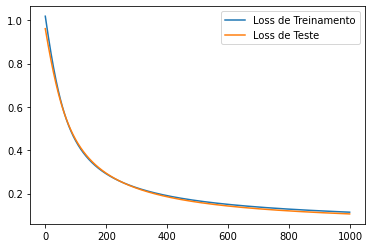

In [17]:
plt.plot(train_losses, label='Loss de Treinamento')
plt.plot(test_losses, label='Loss de Teste')
plt.legend();

De acordo com o gráfico, aparentemente o nosso modelo não está **Overfitting**.

Vamos agora obter a **accuracy** do modelo:

In [18]:
with torch.no_grad():
    p_train = model(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = model(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9764, Test acc: 0.9840


## Salvando o Modelo

Uma vez que temos um modelo construído, é importante que saibamos como salvá-lo para uso posterior.

Primeiramente, vamos olhar o **state_dict()** que representa o estado de nosso modelo:

In [19]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3724, -0.5677, -0.4269, -0.4059, -0.2397, -0.3722, -0.2505, -0.1704,
                       -0.0443,  0.5479, -0.4004,  0.0765, -0.2337, -0.3447,  0.0647, -0.0328,
                       -0.0381, -0.1901,  0.1511,  0.3339, -0.3281, -0.2917, -0.2119, -0.2266,
                       -0.4853, -0.1003, -0.1372, -0.2075, -0.3589, -0.3443]])),
             ('0.bias', tensor([0.4758]))])

Veja que ele nos apresenta os parâmetros do modelo.

Uma vez que só temos uma layer em nosso modelo, o primeiro elemento é a matriz de **weights** e o segundo elemento e o vetor de **bias**.

A próxima etapa é salvar o modelo com a função **torch.save()**:

In [20]:
torch.save(model.state_dict(), 'modelo.pt')

Podemos confirmar com o comando **ls** que agora temos um arquivo `modelo.pt` que representa o nosso modelo persistente em disco:

In [21]:
!ls

modelo.pt  sample_data


A próxima etapa é carregar o modelo e avaliá-lo para verificarmos se ele foi salvo corretamente.

Para fazermos isso, precisamos antes recriá-lo da mesma maneira que fizemos antes e em seguida vamos usar a função **load_state_dict()**, passando para ela o nosso modelo carregado com a função **torch.load()**.

Vejamos o exemplo:

In [22]:
modelo = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

modelo.load_state_dict(torch.load('modelo.pt'))

<All keys matched successfully>

E agora vamos avaliar o modelo que carregamos:

In [23]:
with torch.no_grad():
    p_train = modelo(X_train)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(y_train.numpy() == p_train)

    p_test = modelo(X_test)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9764, Test acc: 0.9840


Também temos a opção de fazer o download de nosso modelo (caso estejamos usando a plataforma Google Colab):

In [24]:
from google.colab import files

files.download('modelo.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>